#Exercise 2
##part 1




In [1]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()



# Access the features (X) and target (y) variables
X = wine_data.data  # Features
y = wine_data.target  # Target variable
transformed_label=[1]*len(wine_data.data)
for i in range(len(y)):
  if y[i]!=1:
    transformed_label[i]=-1



In [2]:
#Normalising the columns of A
A=wine_data.data
import numpy as np



# Normalize the columns of A
min_vals = np.min(A, axis=0)  # Minimum values of each column
max_vals = np.max(A, axis=0)  # Maximum values of each column

# Min-Max normalization
A_normalized = -1 + 2 * ((A - min_vals) / (max_vals - min_vals))





In [3]:
import random
index_array=[i for i in range(len(wine_data.data))]
for i in range(178):
  random.shuffle(index_array)
train_size=int(0.8*len(index_array)) # Use first 80 percent of the index for trainining examples and rest for testing examples
train_index=index_array[:train_size]
test_index=index_array[train_size:]



In [4]:
train_data1=[A[i] for i in train_index]
test_data1=[A[i] for i in test_index]
train_data=np.array(train_data1)
test_data=np.array(test_data1)
train_label1=[transformed_label[i] for i in train_index]
train_label=np.array(train_label1)
test_label1=[transformed_label[i] for i in test_index]
test_label=np.array(test_label1)


In [5]:
def prediction_function(w,x):
  if w.T@x>0:
    pred=1
  elif w.T@x<0:
    pred=-1
  return pred

In [6]:
def accuracy(model_w,data,label):
  k=0
  n=len(data)
  for i in range(n):
    val=prediction_function(w,data[i])
    if val==label[i]:
      k+=1
  accur=float((k/n)*100)
  return accur

##part2
**Original Vector:**

 Let $\mathbf{w}$ be a vector in $\mathbb{R}^d$. This means that $\mathbf{w}$ has $d$ components or coordinates.

**Projected Vector:**

 We want to define a function that projects each component of the vector $\mathbf{w}$ onto the interval [-1, 1]. The resulting vector, denoted as $\mathbf{w'}$, will have the same dimension as $\mathbf{w}$, but with each component bounded within the range [-1, 1].

Projection Function Definition: For each component $w_i$ of the original vector $\mathbf{w}$, the projected component $w'_i$ is defined as follows:

- If $w_i > 1$, then $w'_i$ is set to 1. This ensures that any component greater than 1 is projected to 1.
- If $w_i < -1$, then $w'_i$ is set to -1. This ensures that any component less than -1 is projected to -1.
- If $-1 \leq w_i \leq 1$, then $w'_i$ remains unchanged. This ensures that any component within the range [-1, 1] remains the same after projection.


Given a vector w with d components w_i, the projection function proj(w) is defined as:

proj(w) = w'

where w' is a vector of the same dimension as w and its components are given by:

$w'_i $= {
    1   if w_i > 1
    -1  if w_i < -1
    w_i if -1 ≤ w_i ≤ 1
}

This function projects each component of the vector w onto the interval [-1, 1]. The resulting vector w' has the same dimension as w, with each component bounded within the range [-1, 1].



##part 4

In [7]:
import numpy as np

# Define the hinge loss function Lh
def hinge_loss(y, w, x):
  n=len(w)
  x_=x.reshape(n,1)
  return np.maximum(0, 1 - y *w.T@x)
def log_loss(y,w,x):
  z=-y*w.T@x
  z_star=np.clip(z,-20,20)
  return np.log(1+np.exp(z_star))
def squared_loss(y,w,x):
  n=len(w)
  x_=x.reshape(n,1)
  z=np.maximum(0,1-y*w.T@x_)
  return z**2



# Define the objective function f(w)
def objective_function(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    hinge_loss_term = (1 / n) * np.sum([hinge_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + hinge_loss_term

def objective_log(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    log_loss_term = (1 / n) * np.sum([log_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + log_loss_term

def objective_squared(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    squared_loss_term = (1 / n) * np.sum([squared_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + squared_loss_term


# Define the gradient or sub-gradient function for fi(w) with the hinge loss function Lh
def gradient_hinge_loss(y, w, x, lamda,X):
    n=len(X)
    if 1 - y * w.T@x > 0:
        return (lamda*w/n) -(y * x)/n
    else:
        return (lamda*w/n) + np.zeros_like(w)


## Part 4

In [8]:
import numpy as np

def project_point(point):
    # Project coordinates greater than 1 to 1
    point[point > 1] = 1
    # Project coordinates less than -1 to -1
    point[point < -1] = -1
    return point




In [9]:
# Or i can define a shortened function in python as
def projection_function(z):
  return np.clip(z,-1,1)


##PArt 5

In [10]:
import numpy as np
import random

def OPT1(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.zeros((d, 1))

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x, lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1
    return w


## Part 6

In [11]:
def Objective_value(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = objective_function(w, lambda_val, data, label)
        objective_values.append(val)

    return objective_values




In [12]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val=[]
for i in lam:
  a=Objective_value(data,label,i,500)
  obj_val.append(a)


In [13]:
import matplotlib.pyplot as plt

def plot_lambda_values(obj):
    num_epochs = len(obj[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(obj):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective Value')
    plt.title('Objective Value vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()



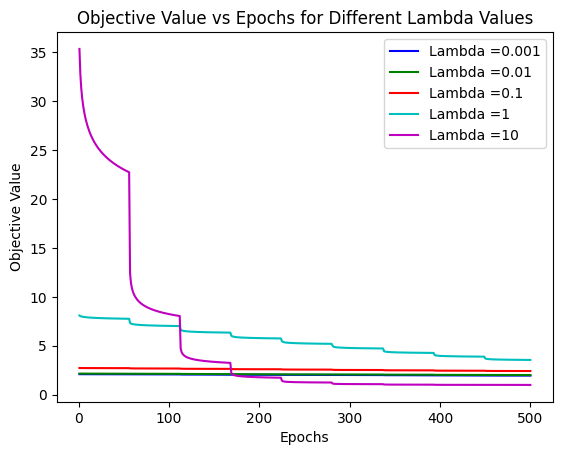

In [14]:
plot_lambda_values(obj_val)

In [15]:
def predict1(w,x):
  if w.T@x>0:
    return 1
  elif w.T@x<0:
    return -1
def accuracy1(data,label,model_w):
  k=0
  n=len(data)
  d=data.shape[1]
  for i in range(n):
    a=predict1(model_w,data[i].reshape(d,1))
    if a==label[i]:
      k+=1
  acc=float((k/n)*100)
  return acc

def test_set_acc(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [16]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val=[]
for i in lam:
  a=test_set_acc(data1,label1,i,500)
  acc_val.append(a)

In [17]:
import matplotlib.pyplot as plt

def plot_acc_values(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

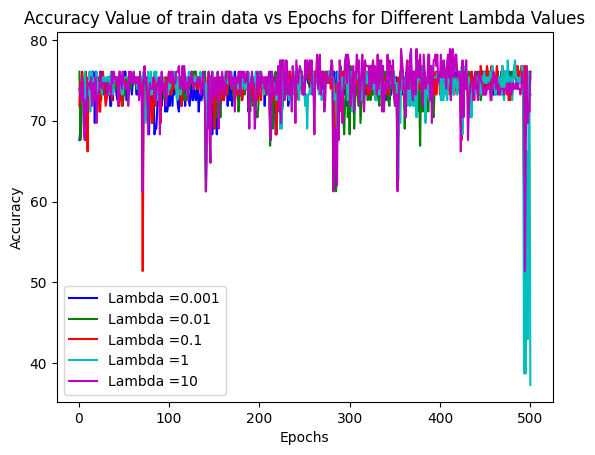

In [18]:
plot_acc_values(acc_val)

In [19]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val2=[]
for i in lam:
  a=test_set_acc(data2,label2,i,500)
  acc_val2.append(a)

In [20]:
import matplotlib.pyplot as plt

def plot_acc_values2(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

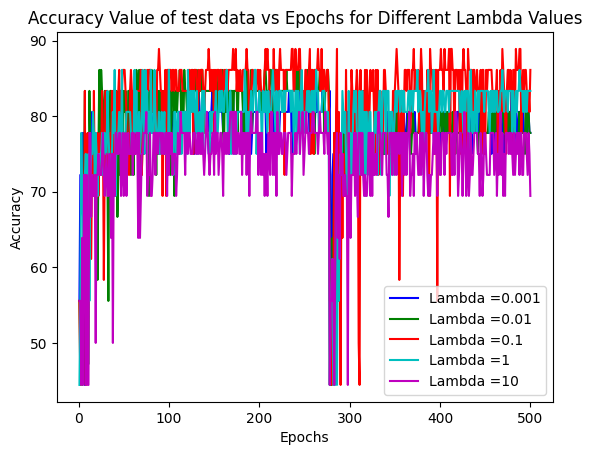

In [21]:
plot_acc_values2(acc_val2)

In [22]:
import pandas as pd

# Create an empty DataFrame
empty_df = pd.DataFrame()
empty_df["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val[0],acc_val2[0]))
empty_df["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val[1],acc_val2[1]))
empty_df["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val[2],acc_val2[2]))
empty_df["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val[3],acc_val2[3]))
empty_df["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val[4],acc_val2[4]))
empty_df





,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(67.6056338028169, 55.55555555555556)","(76.05633802816901, 55.55555555555556)","(71.83098591549296, 55.55555555555556)","(73.94366197183099, 44.44444444444444)","(73.94366197183099, 55.55555555555556)"
1,"(69.01408450704226, 72.22222222222221)","(67.6056338028169, 44.44444444444444)","(74.64788732394366, 44.44444444444444)","(73.94366197183099, 55.55555555555556)","(73.23943661971832, 55.55555555555556)"
2,"(73.23943661971832, 72.22222222222221)","(69.71830985915493, 55.55555555555556)","(74.64788732394366, 55.55555555555556)","(73.23943661971832, 77.77777777777779)","(72.53521126760563, 44.44444444444444)"
3,"(73.23943661971832, 69.44444444444444)","(75.35211267605634, 44.44444444444444)","(76.05633802816901, 55.55555555555556)","(73.23943661971832, 69.44444444444444)","(75.35211267605634, 63.888888888888886)"
4,"(74.64788732394366, 77.77777777777779)","(72.53521126760563, 55.55555555555556)","(74.64788732394366, 55.55555555555556)","(71.83098591549296, 66.66666666666666)","(74.64788732394366, 44.44444444444444)"
...,...,...,...,...,...
495,"(74.64788732394366, 80.55555555555556)","(71.83098591549296, 77.77777777777779)","(75.35211267605634, 83.33333333333334)","(66.19718309859155, 80.55555555555556)","(76.76056338028168, 75.0)"
496,"(76.05633802816901, 80.55555555555556)","(73.94366197183099, 80.55555555555556)","(73.23943661971832, 83.33333333333334)","(42.95774647887324, 83.33333333333334)","(69.71830985915493, 72.22222222222221)"
497,"(73.94366197183099, 80.55555555555556)","(70.4225352112676, 80.55555555555556)","(75.35211267605634, 83.33333333333334)","(71.83098591549296, 83.33333333333334)","(71.83098591549296, 77.77777777777779)"
498,"(73.23943661971832, 77.77777777777779)","(74.64788732394366, 77.77777777777779)","(73.94366197183099, 80.55555555555556)","(76.05633802816901, 83.33333333333334)","(71.12676056338029, 75.0)"


## Part 7

In [23]:
def logistic_loss_gradient(y,w,x,lamda,X):
  n=len(X)
  z=1-y*w.T@x
  z_star=np.clip(z,-500,500)
  return lamda*w/n + (1/n)*(-y*x*(np.exp(z_star-1)))/(1+np.exp(z_star-1))

def squared_hinge_loss_gradient(y,w,x,lamda,X):
  n=len(X)
  z=1-y*w.T@x
  if z>0:
    return (lamda*w/n) +(1/n)*(-2*y*x)*(z)
  else:
    return lamda*w/n




In [24]:
def Objective_value_logistic(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = logistic_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = objective_log(w, lambda_val, data, label)
        objective_values.append(val)

    return objective_values

In [25]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val_log=[]
for i in lam:
  b=Objective_value_logistic(data,label,i,500)
  obj_val_log.append(b)

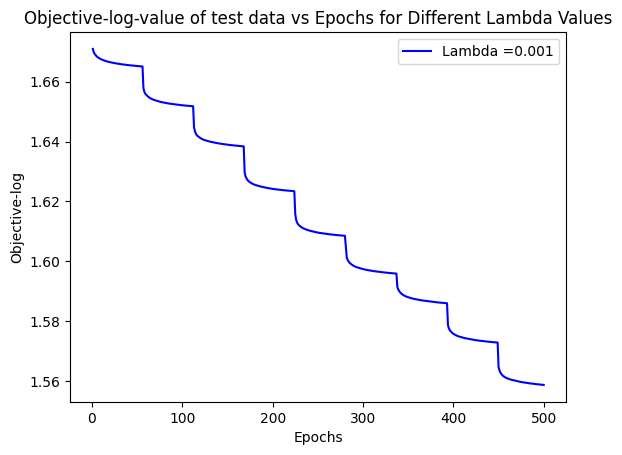

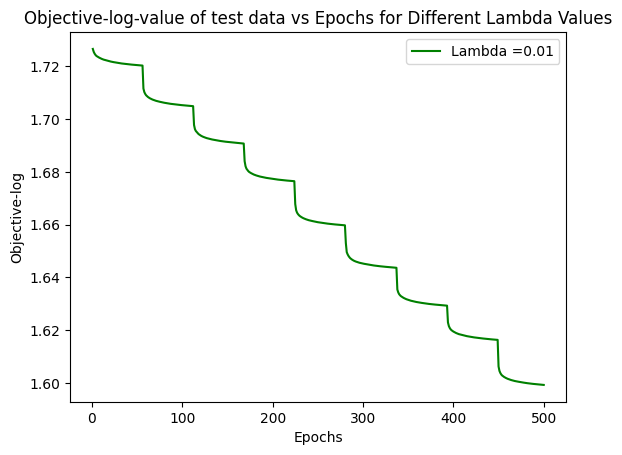

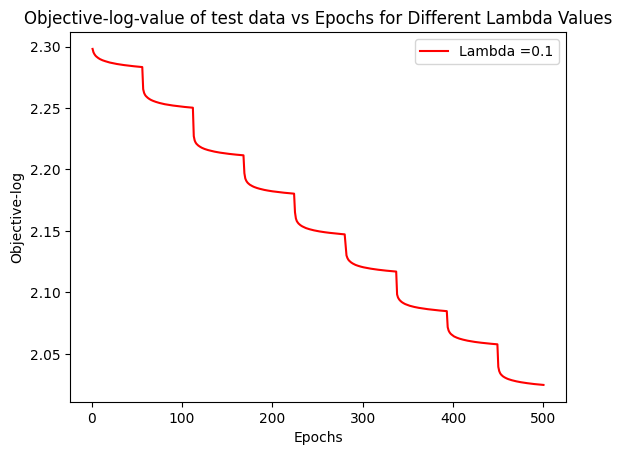

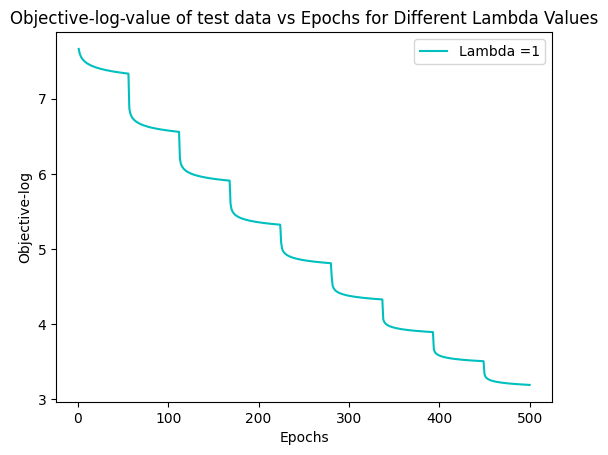

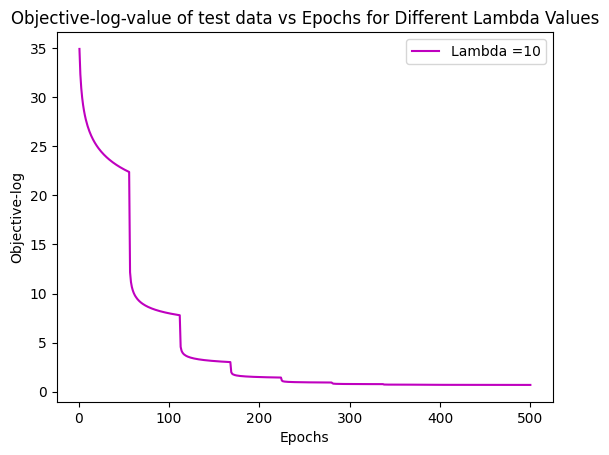

In [26]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val_log):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective-log')
    plt.title('Objective-log-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

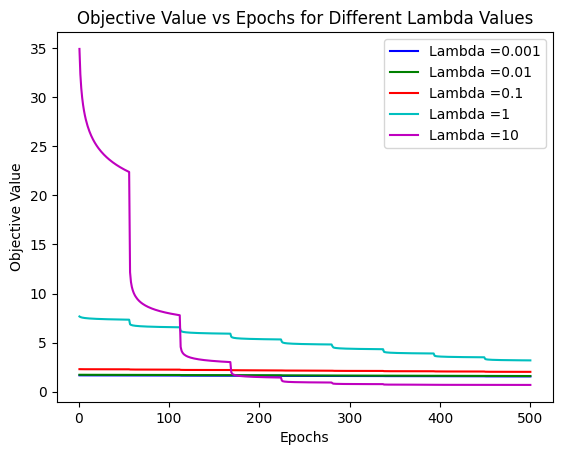

In [27]:
plot_lambda_values(obj_val_log)

In [28]:
def set_acc_logistic(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = logistic_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [29]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val_log=[]
for i in lam:
  c=set_acc_logistic(data1,label1,i,500)
  acc_val_log.append(c)

In [30]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val_log2=[]
for i in lam:
  d=set_acc_logistic(data2,label2,i,500)
  acc_val_log2.append(d)

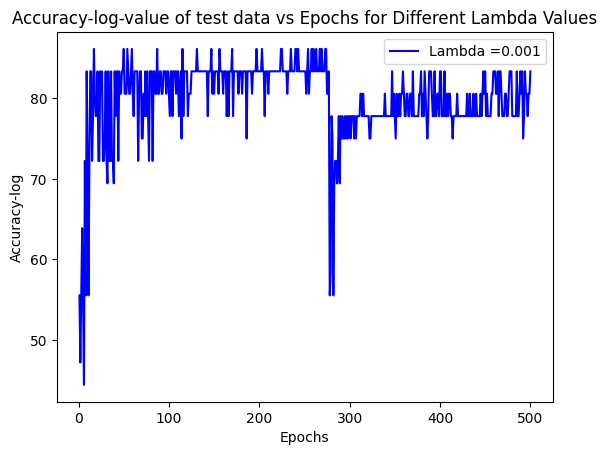

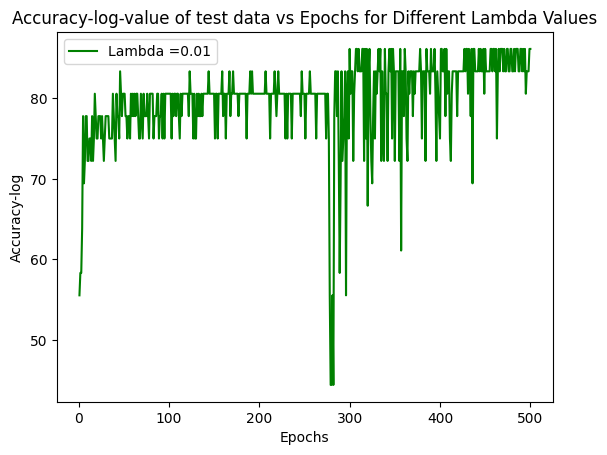

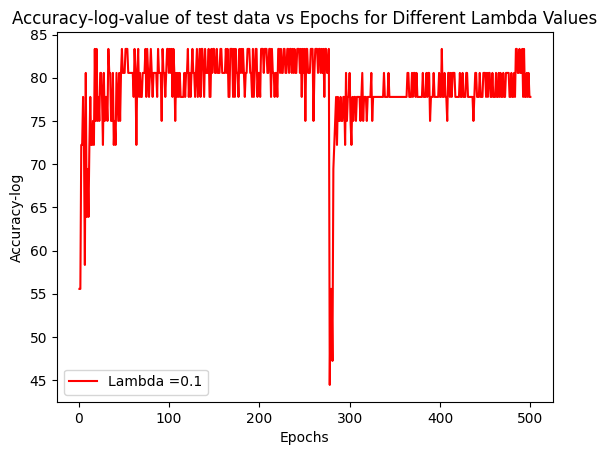

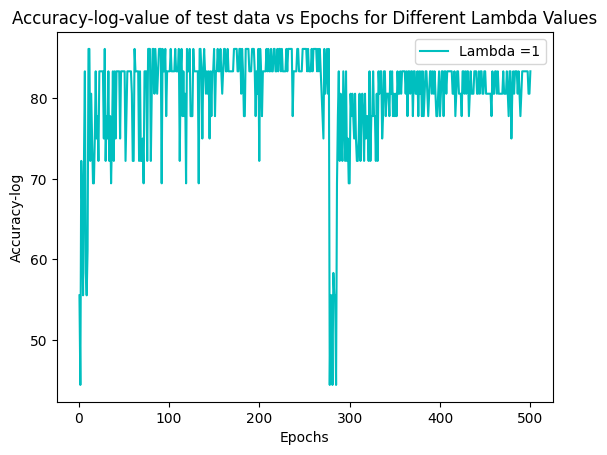

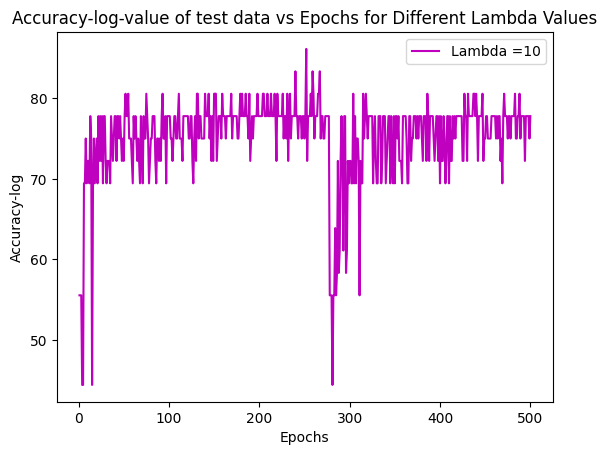

In [31]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_log2):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-log')
    plt.title('Accuracy-log-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

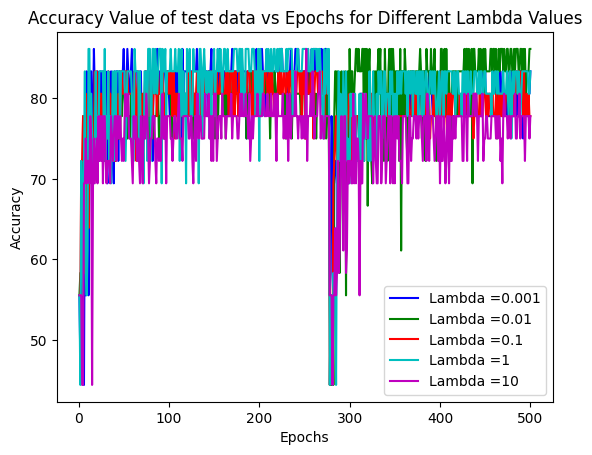

In [32]:
plot_acc_values2(acc_val_log2)

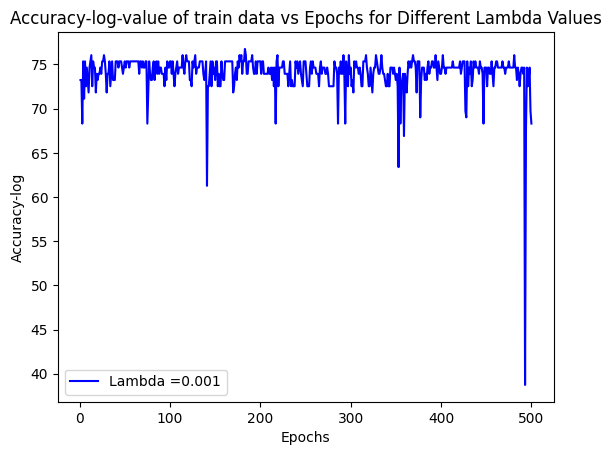

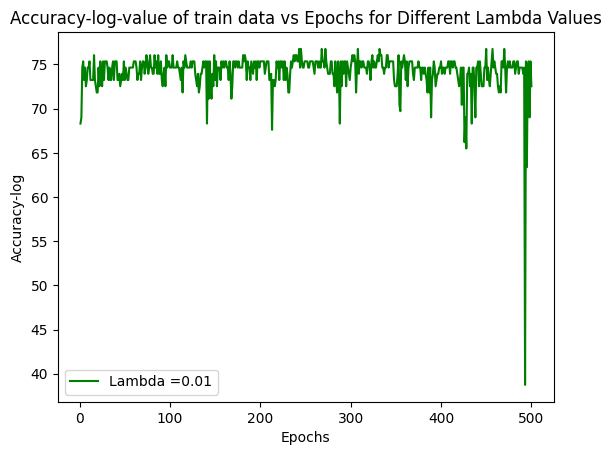

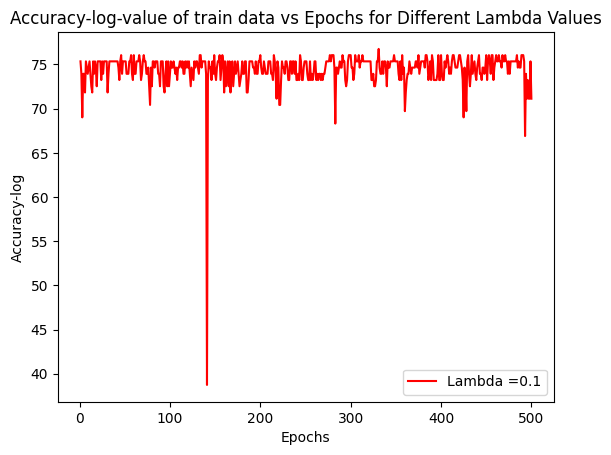

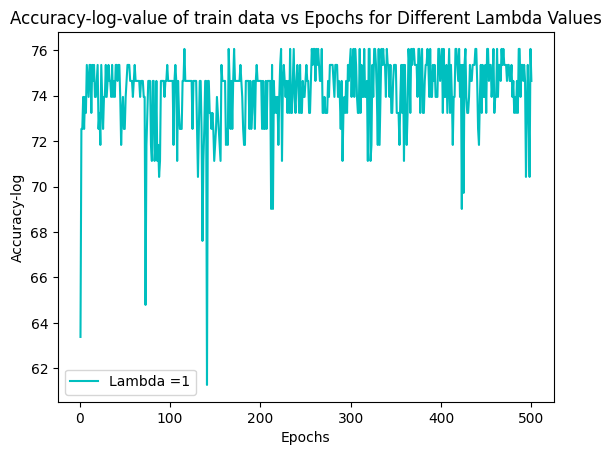

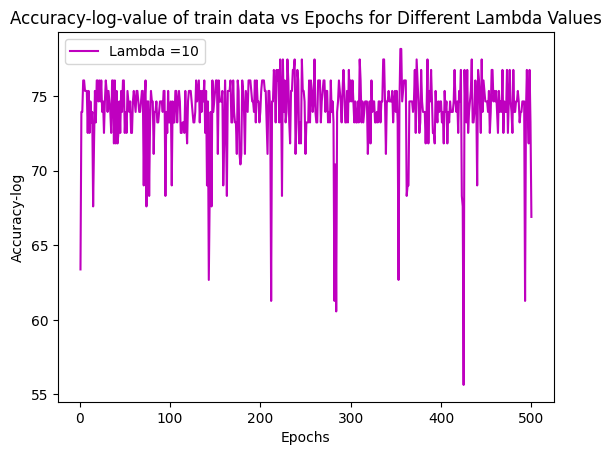

In [33]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_log):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-log')
    plt.title('Accuracy-log-value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [34]:
def Objective_value_squared(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = squared_hinge_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val2 = objective_squared(w, lambda_val, data, label)
        objective_values.append(val2)

    return objective_values

In [35]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val_sqr=[]
for i in lam:
  e=Objective_value_squared(data,label,i,500)
  obj_val_sqr.append(e)

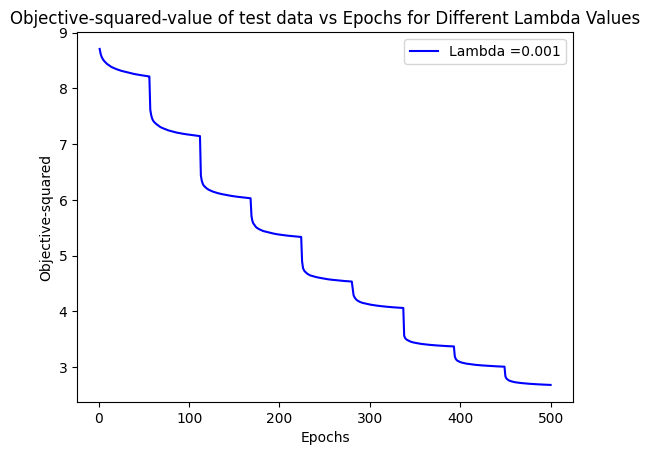

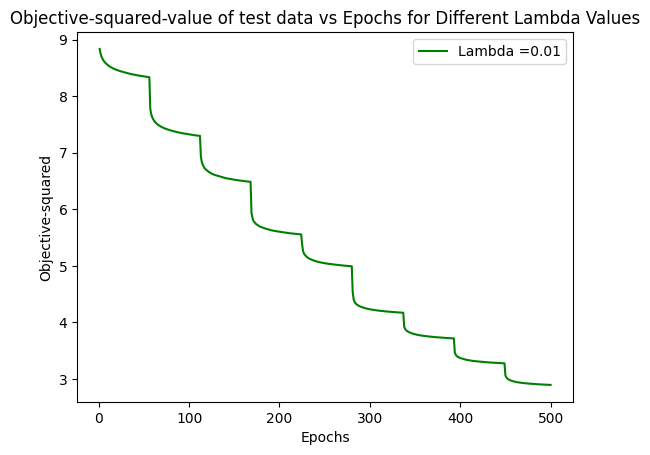

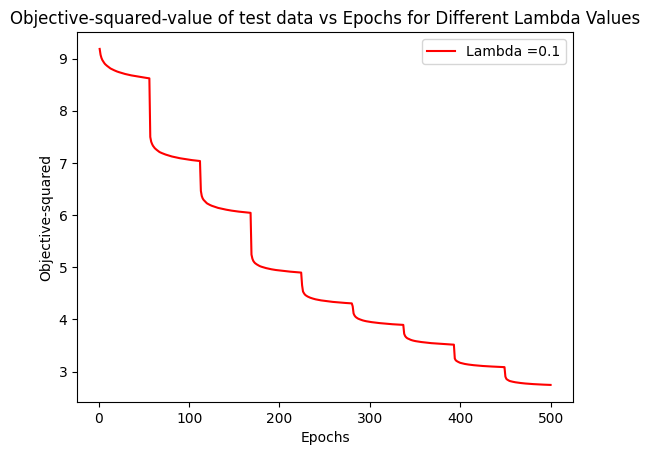

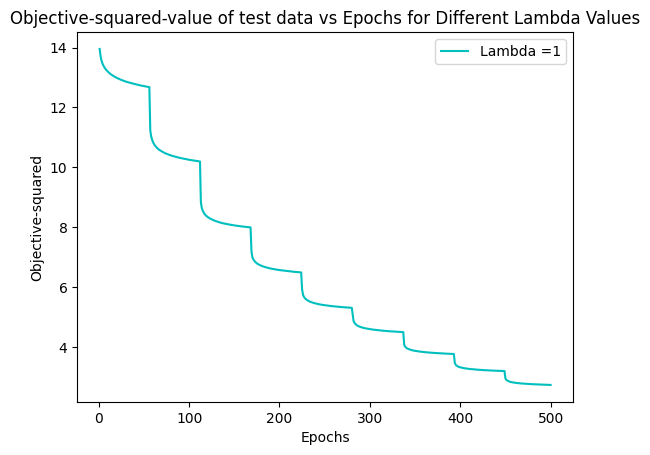

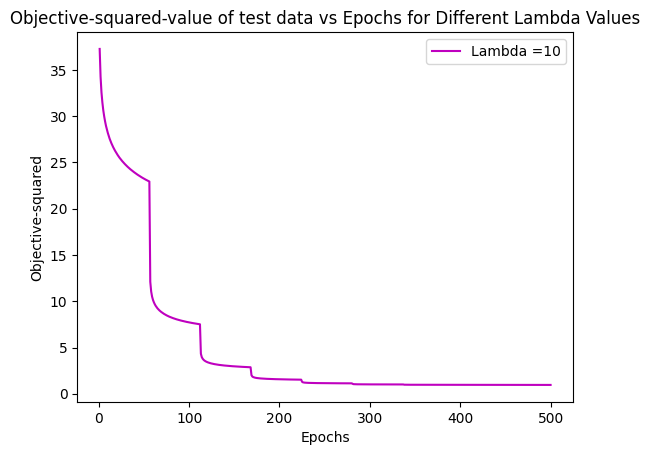

In [36]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val_sqr):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective-squared')
    plt.title('Objective-squared-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [37]:
import matplotlib.pyplot as plt

def plot_lambda_values3(obj):
    num_epochs = len(obj[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(obj):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective Value')
    plt.title('Objective Value  of squared vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

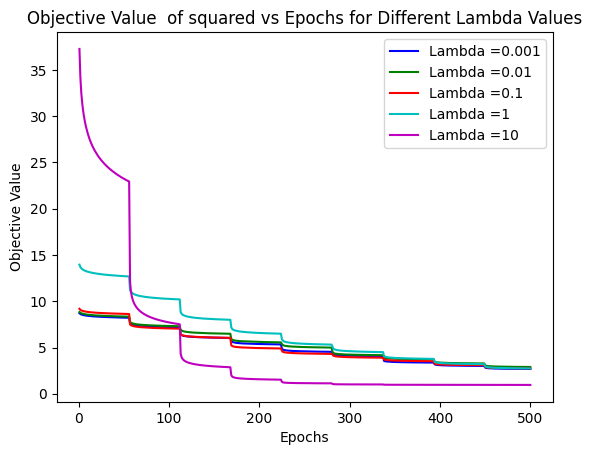

In [38]:
plot_lambda_values3(obj_val_sqr)

In [39]:
def set_acc_squared(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = squared_hinge_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [40]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val_sqr=[]
for i in lam:
  d1=set_acc_squared(data2,label2,i,500)
  acc_val_sqr.append(d1)

In [41]:
import matplotlib.pyplot as plt

def plot_acc_sqrtest(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of test data for squared loss vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

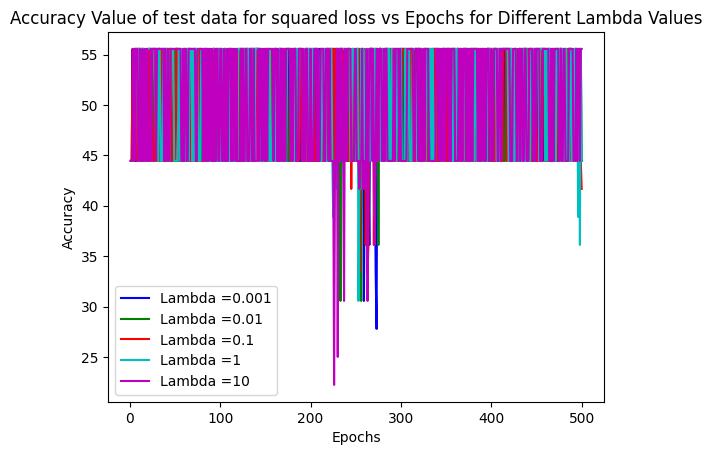

In [42]:
plot_acc_sqrtest(acc_val_sqr)

In [43]:
import matplotlib.pyplot as plt

def plot_acc_sqrtrain(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of train data for squared loss vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [44]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=train_data
label2=train_label

acc_val_sqr2=[]
for i in lam:
  d2=set_acc_squared(data2,label2,i,500)
  acc_val_sqr2.append(d2)

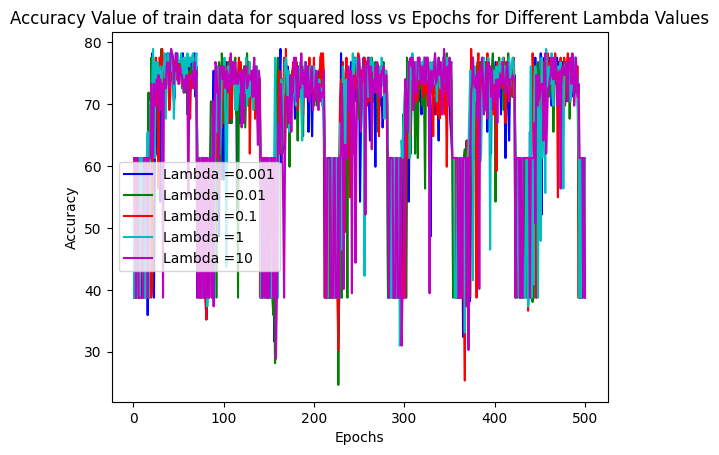

In [45]:
plot_acc_sqrtrain(acc_val_sqr2)

## Tabulating The values for Squared loss

In [46]:
for i in acc_val_sqr2:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val_sqr:
  for j in range(len(i)):
    i[j]=round(i[j],2)

In [47]:
# Create an empty DataFrame
df_squared_accuracy = pd.DataFrame()
df_squared_accuracy["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[0],acc_val_sqr[0]))
df_squared_accuracy["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[1],acc_val_sqr[1]))
df_squared_accuracy["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[2],acc_val_sqr[2]))
df_squared_accuracy["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[3],acc_val_sqr[3]))
df_squared_accuracy["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[4],acc_val_sqr[4]))
df_squared_accuracy

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(38.73, 44.44)","(38.73, 44.44)","(61.27, 44.44)","(38.73, 44.44)","(61.27, 44.44)"
1,"(61.27, 44.44)","(61.27, 44.44)","(38.73, 44.44)","(61.27, 44.44)","(61.27, 44.44)"
2,"(38.73, 55.56)","(38.73, 44.44)","(38.73, 55.56)","(61.27, 44.44)","(38.73, 44.44)"
3,"(38.73, 44.44)","(61.27, 44.44)","(38.73, 55.56)","(38.73, 44.44)","(61.27, 55.56)"
4,"(61.27, 55.56)","(61.27, 44.44)","(61.27, 44.44)","(61.27, 55.56)","(61.27, 44.44)"
...,...,...,...,...,...
495,"(61.27, 44.44)","(38.73, 44.44)","(38.73, 44.44)","(38.73, 38.89)","(61.27, 55.56)"
496,"(38.73, 38.89)","(38.73, 55.56)","(61.27, 55.56)","(38.73, 55.56)","(61.27, 55.56)"
497,"(61.27, 44.44)","(61.27, 55.56)","(61.27, 55.56)","(61.27, 36.11)","(38.73, 44.44)"
498,"(61.27, 44.44)","(61.27, 55.56)","(61.27, 44.44)","(38.73, 55.56)","(61.27, 55.56)"


## Tabulating The values for Logistic Objective

In [48]:
for i in acc_val_log:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val_log2:
  for j in range(len(i)):
    i[j]=round(i[j],2)

In [49]:
# Create an empty DataFrame
df_logistic_accuracy = pd.DataFrame()
df_logistic_accuracy["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val_log[0],acc_val_log2[0]))
df_logistic_accuracy["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val_log[1],acc_val_log2[1]))
df_logistic_accuracy["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val_log[2],acc_val_log2[2]))
df_logistic_accuracy["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val_log[3],acc_val_log2[3]))
df_logistic_accuracy["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val_log[4],acc_val_log2[4]))
df_logistic_accuracy

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(73.24, 55.56)","(68.31, 55.56)","(75.35, 55.56)","(63.38, 55.56)","(63.38, 55.56)"
1,"(73.24, 47.22)","(69.01, 58.33)","(73.94, 55.56)","(72.54, 44.44)","(73.94, 55.56)"
2,"(68.31, 55.56)","(74.65, 58.33)","(69.01, 72.22)","(72.54, 72.22)","(73.94, 55.56)"
3,"(75.35, 63.89)","(75.35, 63.89)","(73.94, 72.22)","(73.94, 66.67)","(76.06, 44.44)"
4,"(71.13, 55.56)","(73.24, 77.78)","(73.94, 77.78)","(72.54, 55.56)","(76.06, 44.44)"
...,...,...,...,...,...
495,"(72.54, 80.56)","(74.65, 83.33)","(73.24, 80.56)","(75.35, 83.33)","(73.94, 77.78)"
496,"(73.24, 77.78)","(75.35, 83.33)","(71.13, 77.78)","(73.24, 83.33)","(71.83, 77.78)"
497,"(74.65, 80.56)","(69.01, 83.33)","(71.13, 80.56)","(70.42, 80.56)","(76.76, 77.78)"
498,"(69.72, 80.56)","(75.35, 86.11)","(75.35, 77.78)","(76.06, 80.56)","(73.24, 75.0)"


## Observations:
Here We can observe that accuracy for train and test data is greater when logistic loss is considered  as compared to accuracy for train and test data when squared loss is considered, Moreover The accuracy for squared loss is minimum among all the loses